<a href="https://colab.research.google.com/github/kridtapon/Zero-Line-Harmony/blob/main/Zero_Line_Harmony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.5/527.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.3 MB/s eta 0:00:00


In [24]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate the Trix Indicator
def calculate_trix(data, period):
    """
    Calculate the Trix (Triple Exponential Moving Average).
    """
    ema1 = data['Close'].ewm(span=period, min_periods=period).mean()
    ema2 = ema1.ewm(span=period, min_periods=period).mean()
    ema3 = ema2.ewm(span=period, min_periods=period).mean()
    trix = 100 * (ema3 - ema3.shift(1)) / ema3.shift(1)
    return trix

# Function to calculate the Detrended Price Oscillator (DPO)
def calculate_dpo(data, period):
    """
    Calculate the Detrended Price Oscillator (DPO).
    """
    sma = data['Close'].rolling(window=period).mean()
    dpo = data['Close'] - sma
    return dpo

# Define the stock symbol and time period
symbol = 'KKR' # KKR META TPL TPR TRGP
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Calculate the Trix and DPO indicators
trix_period = 14  # Set your desired period for Trix
dpo_period = 14  # Set your desired period for DPO

df['Trix'] = calculate_trix(df, trix_period)
df['DPO'] = calculate_dpo(df, dpo_period)

# Define Entry and Exit signals based on Trix and DPO conditions
df['Entry'] = (df['Trix'] > 0) & (df['DPO'] > 0)  # Buy when Trix crosses above zero and DPO is rising
df['Exit'] = (df['Trix'] < 0) & (df['DPO'] < 0)  # Sell when Trix crosses below zero and DPO is falling

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                           499949.322684
Total Return [%]                       399.949323
Benchmark Return [%]                   432.027318
Max Gross Exposure [%]                      100.0
Total Fees Paid                       5472.727902
Max Drawdown [%]                        35.739228
Max Drawdown Duration                       562.0
Total Trades                                   12
Total Closed Trades                            12
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            66.666667
Best Trade [%]                          71.173059
Worst Trade [%]                        -14.024427
Avg Winning Trade [%]                   29.010027
Avg Losing Trade [%]                    -6.764595


[*********************100%***********************]  1 of 1 completed


Best Trix Period: 9
Best DPO Period: 30
Best Total Return: 11.016481390019864
Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                          1201648.139002
Total Return [%]                      1101.648139
Benchmark Return [%]                   396.466043
Max Gross Exposure [%]                      100.0
Total Fees Paid                      19952.741736
Max Drawdown [%]                        38.646794
Max Drawdown Duration                       481.0
Total Trades                                   19
Total Closed Trades                            19
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            63.157895
Best Trade [%]                          88.306551
Worst Trade [%]                        -13.163029
Avg Winning Trade [%] 

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



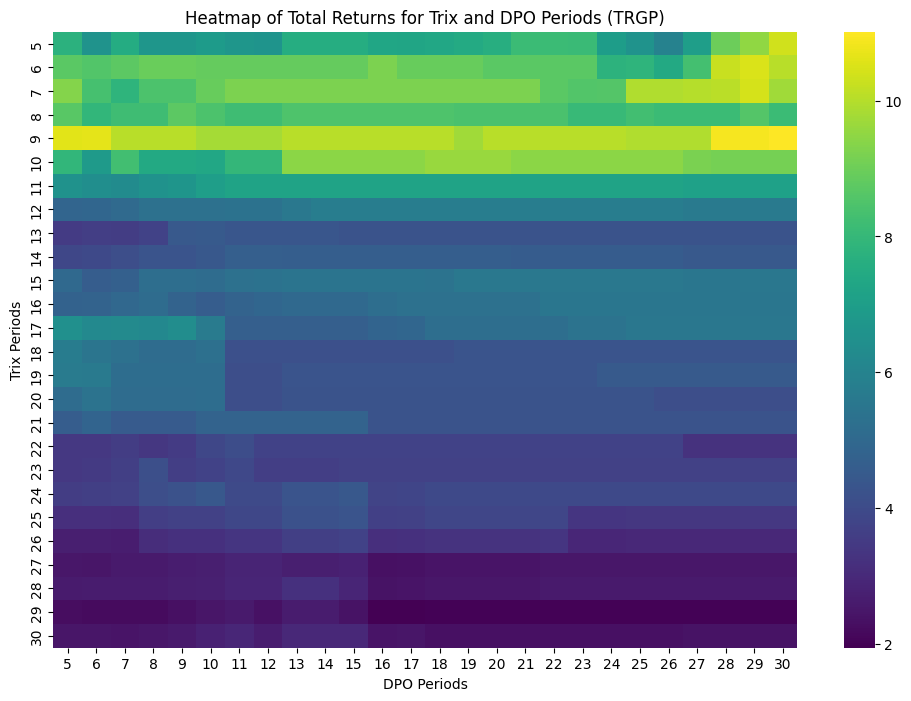

In [39]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
from itertools import product

# Function to calculate the Trix Indicator
def calculate_trix(data, period):
    ema1 = data['Close'].ewm(span=period, min_periods=period).mean()
    ema2 = ema1.ewm(span=period, min_periods=period).mean()
    ema3 = ema2.ewm(span=period, min_periods=period).mean()
    trix = 100 * (ema3 - ema3.shift(1)) / ema3.shift(1)
    return trix

# Function to calculate the Detrended Price Oscillator (DPO)
def calculate_dpo(data, period):
    sma = data['Close'].rolling(window=period).mean()
    dpo = data['Close'] - sma
    return dpo

# Define the stock symbol and time period
symbol = 'TRGP' # META TPL TPR TRGP
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Define the parameter ranges
trix_periods = range(5, 31)  # Trix periods from 5 to 30
dpo_periods = range(5, 31)  # DPO periods from 5 to 30

# Initialize variables to store the best results
best_return = -np.inf
best_trix_period = None
best_dpo_period = None
best_portfolio = None

# Perform grid search over parameter combinations
for trix_period, dpo_period in product(trix_periods, dpo_periods):
    # Calculate Trix and DPO
    df['Trix'] = calculate_trix(df, trix_period)
    df['DPO'] = calculate_dpo(df, dpo_period)

    # Define Entry and Exit signals based on Trix and DPO conditions
    df['Entry'] = (df['Trix'] > 0) & (df['DPO'] > 0)
    df['Exit'] = (df['Trix'] < 0) & (df['DPO'] < 0)

    # Filter data for the test period (2020-2025)
    df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=df['Close'],
        entries=df['Entry'],
        exits=df['Exit'],
        init_cash=100_000,
        fees=0.001
    )

    # Evaluate performance (using Total Return as a metric)
    total_return = portfolio.total_return()

    # Update the best parameters if current Total Return is higher
    if total_return > best_return:
        best_return = total_return
        best_trix_period = trix_period
        best_dpo_period = dpo_period
        best_portfolio = portfolio

# Display the best parameters and performance metrics
print(f"Best Trix Period: {best_trix_period}")
print(f"Best DPO Period: {best_dpo_period}")
print(f"Best Total Return: {best_return}")
print(best_portfolio.stats())

# Plot equity curve of the best portfolio
best_portfolio.plot().show()

# Convert results to a DataFrame for heatmap plotting
heatmap_data = pd.DataFrame(
    [[results.get((tp, dp), np.nan) for dp in dpo_periods] for tp in trix_periods],
    index=list(trix_periods),
    columns=list(dpo_periods)
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, fmt=".2f", cmap="viridis")
plt.title(f"Heatmap of Total Returns for Trix and DPO Periods ({symbol})")
plt.xlabel("DPO Periods")
plt.ylabel("Trix Periods")
plt.show()


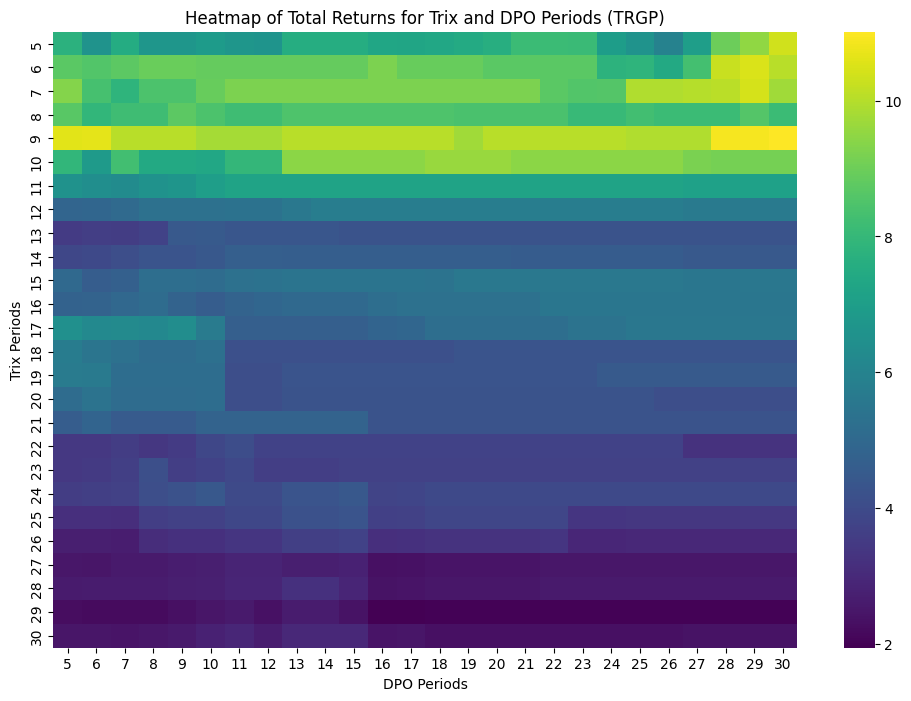

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import vectorbt as vbt
from itertools import product

# Initialize a dictionary to store total returns for each combination
results = {}

# Perform grid search over parameter combinations
for trix_period, dpo_period in product(trix_periods, dpo_periods):
    # Calculate Trix and DPO
    df['Trix'] = calculate_trix(df, trix_period)
    df['DPO'] = calculate_dpo(df, dpo_period)

    # Define Entry and Exit signals based on Trix and DPO conditions
    df['Entry'] = (df['Trix'] > 0) & (df['DPO'] > 0)
    df['Exit'] = (df['Trix'] < 0) & (df['DPO'] < 0)

    # Filter data for the test period (2020-2025)
    df_filtered = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=df_filtered['Close'],
        entries=df_filtered['Entry'],
        exits=df_filtered['Exit'],
        init_cash=100_000,
        fees=0.001
    )

    # Evaluate performance (using Total Return as a metric)
    total_return = portfolio.total_return()
    results[(trix_period, dpo_period)] = total_return

# Convert results to a DataFrame for heatmap plotting
heatmap_data = pd.DataFrame(
    [[results.get((tp, dp), np.nan) for dp in dpo_periods] for tp in trix_periods],
    index=list(trix_periods),
    columns=list(dpo_periods)
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, fmt=".2f", cmap="viridis")
plt.title(f"Heatmap of Total Returns for Trix and DPO Periods ({symbol})")
plt.xlabel("DPO Periods")
plt.ylabel("Trix Periods")
plt.show()
